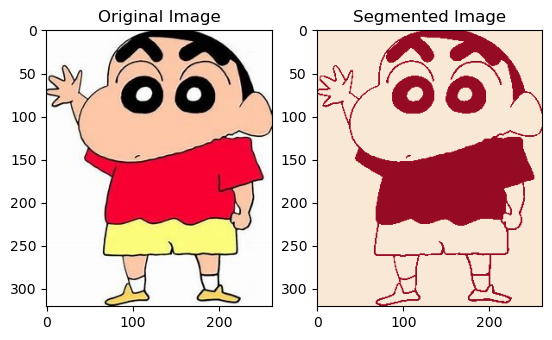

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 加载图像
image = cv2.imread('123.jpg')
# 将图像从BGR空间转换到RGB空间
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# 将图像数据转换为(height * width, channels)的二维数组
pixels = image.reshape((-1, 3))
# 转换为np.float32数据类型
pixels = np.float32(pixels)

# 定义终止条件
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
# 定义簇数量
k = 2
# 执行k-means算法
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# 将簇中心转换回uint8数据类型
centers = np.uint8(centers)
# 将每个像素点的标签转换回其簇中心的颜色值
segmented_image = centers[labels.flatten()]
# 将图像数据重新转换为原始图像的形状
segmented_image = segmented_image.reshape(image.shape)

# 显示原始图像和分割后的图像
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.show()